In [2]:
# Import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# For plot style uniformity.
sns.set_theme(style="whitegrid", palette="Blues_r")

In [4]:
df = pd.read_csv("diabetes_risk_prediction_dataset.csv")
print(df.shape)
df.head()

(520, 17)


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [5]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [6]:
df.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [7]:
# Column list
df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

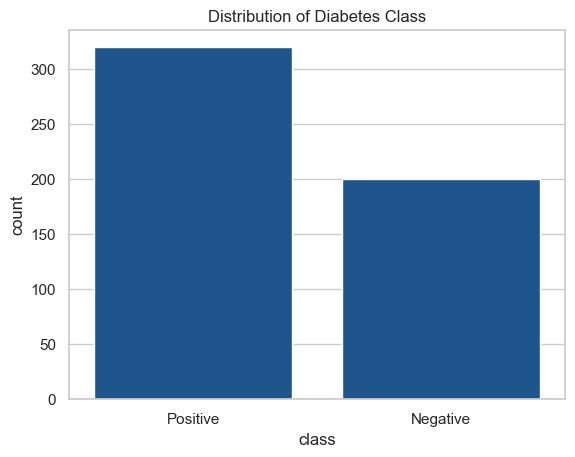

class
Positive    61.54
Negative    38.46
Name: proportion, dtype: float64

In [8]:
''' 
Printing out the distribution of the class (postive\negative) in the dataset.
To also asses Class target balance
'''
sns.countplot(x='class', data=df)
plt.title("Distribution of Diabetes Class")
plt.show()

(df['class'].value_counts(normalize=True) * 100).round(2)

In [9]:
# Inspecting Column Data Types
categorical = df.select_dtypes(include='object').columns
numerical = df.select_dtypes(exclude='object').columns

print("Categorical:", list(categorical))
print("Numerical:", list(numerical))

Categorical: ['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity', 'class']
Numerical: ['Age']


In [10]:
df.tail(10)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
510,67,Male,No,No,No,Yes,No,No,No,Yes,No,Yes,No,No,Yes,No,Negative
511,66,Male,No,No,No,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Yes,No,Negative
512,43,Male,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,Negative
513,62,Female,Yes,Yes,Yes,Yes,No,No,Yes,No,No,No,Yes,No,No,Yes,Positive
514,54,Female,Yes,Yes,Yes,Yes,Yes,No,No,No,No,No,Yes,No,No,No,Positive
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative
519,42,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative


In [11]:

# For future analysis on correlation and feature importance, we need to encode the categorical features
df_encoded = df.copy()

# Map Yes/No to 1/0, and Male/Female to 1/0
df_encoded = (
    df_encoded
    .replace({
        'Yes': 1, 'No': 0,
        'Male': 1, 'Female': 0,
        'Positive': 1, 'Negative': 0
    })
    .infer_objects(copy=False)
)

df_encoded.head()

C:\Users\Joebass\AppData\Local\Temp\ipykernel_4868\2565750137.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


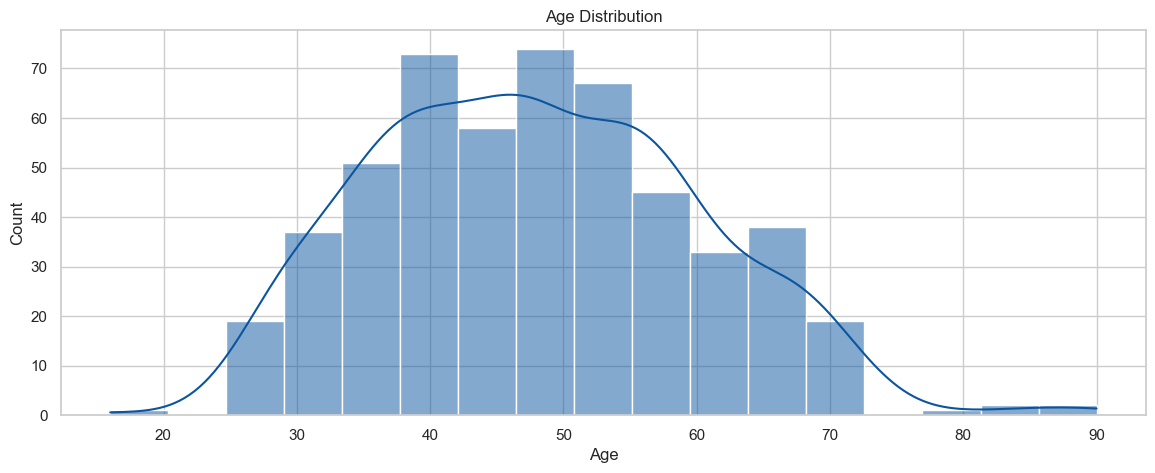

In [12]:
# Feature distribution on the Age catergory
plt.figure(figsize=(14,5))
sns.histplot(df['Age'], kde=True)
plt.title("Age Distribution")
plt.show()

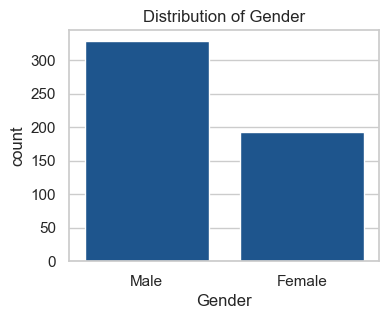

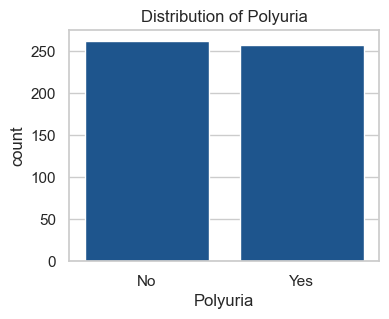

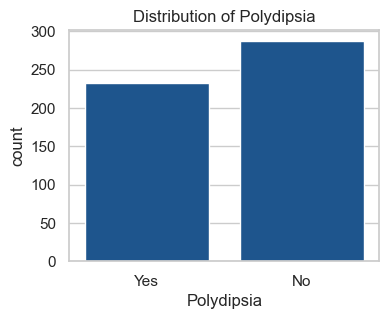

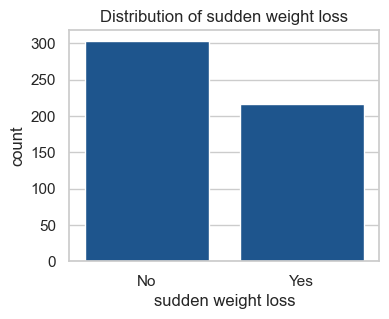

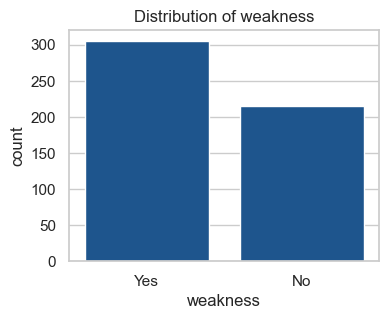

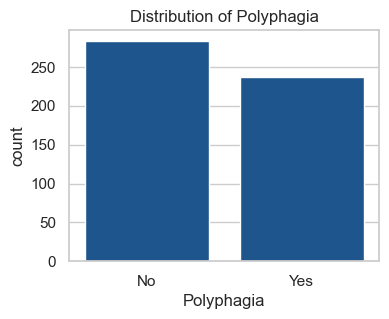

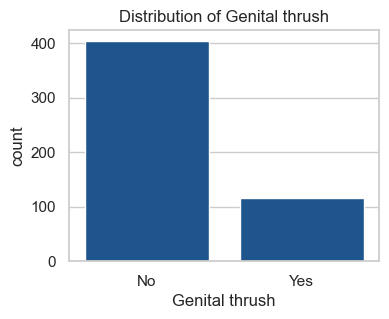

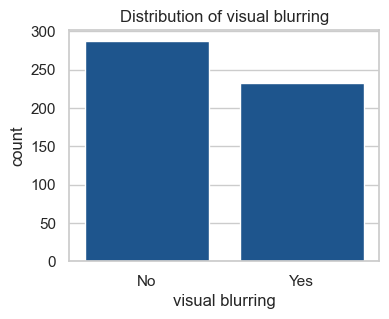

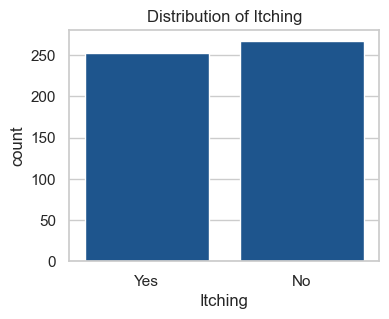

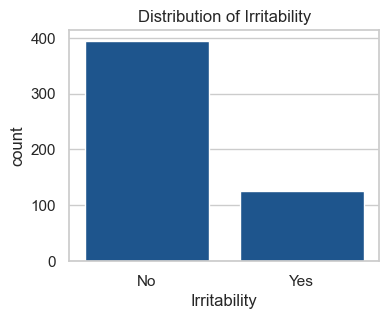

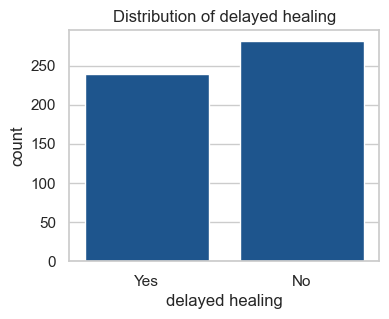

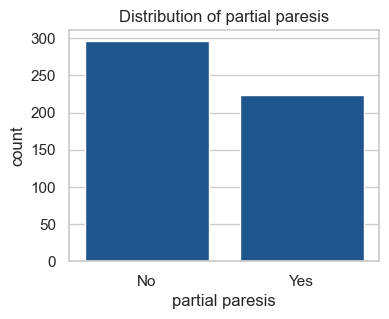

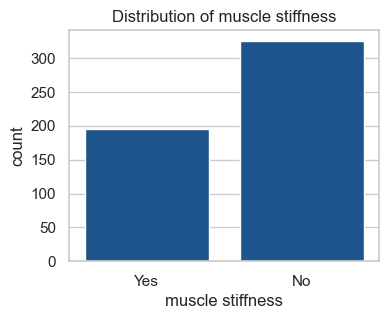

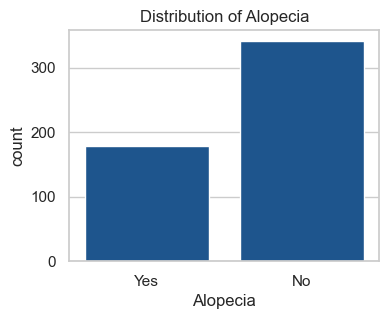

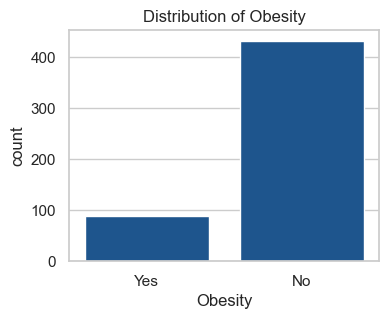

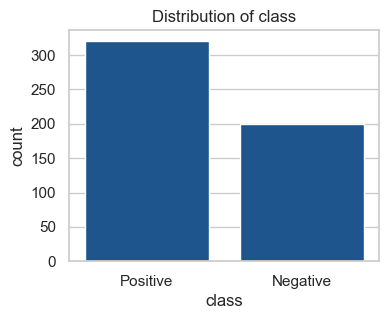

In [13]:
# Create figure and axes for the subplots
for col in categorical:
    plt.figure(figsize=(4,3))
    sns.countplot(x=col, data=df)
    plt.title(f"Distribution of {col}")
    plt.show()

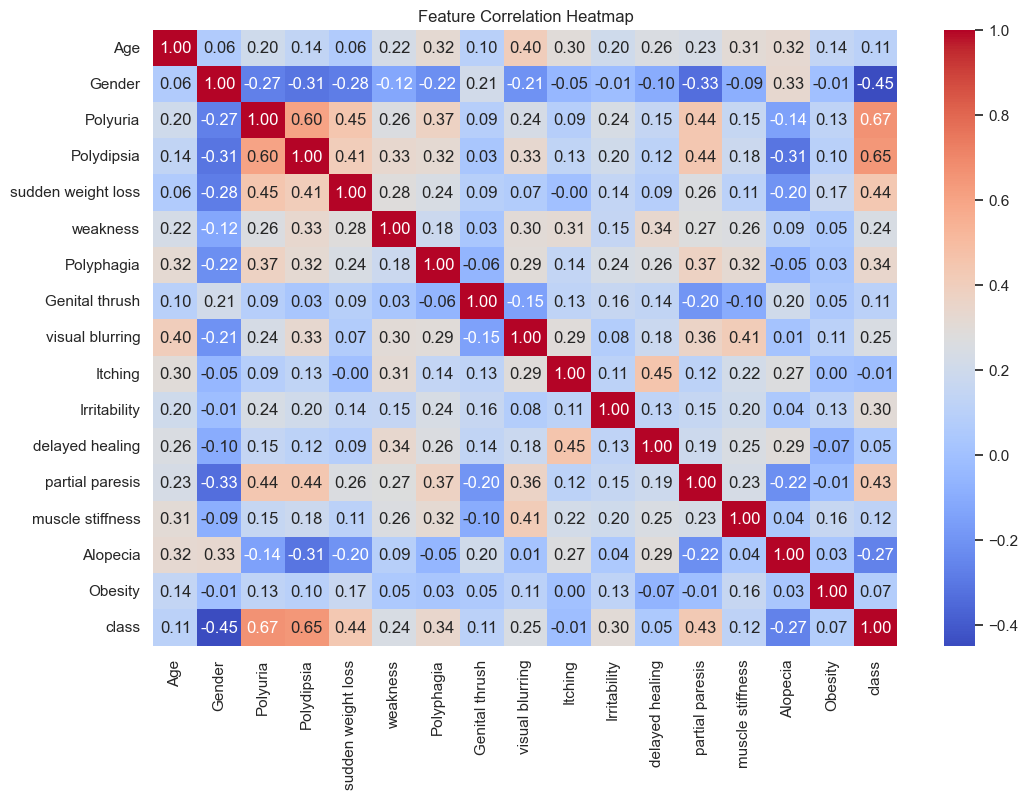

In [14]:
# Correlation Analysis
corr = df_encoded.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

In [15]:
target_corr = corr['class'].sort_values(ascending=False)
print(target_corr)

class                 1.000000
Polyuria              0.665922
Polydipsia            0.648734
sudden weight loss    0.436568
partial paresis       0.432288
Polyphagia            0.342504
Irritability          0.299467
visual blurring       0.251300
weakness              0.243275
muscle stiffness      0.122474
Genital thrush        0.110288
Age                   0.108679
Obesity               0.072173
delayed healing       0.046980
Itching              -0.013384
Alopecia             -0.267512
Gender               -0.449233
Name: class, dtype: float64


In [16]:
# Exclude the target itself, but printing out top 5, from but positive and negative correlation.
# target_corr = target_corr.drop('class')

top_positive = target_corr.head(6).iloc[1:6]
top_negative = target_corr.tail(5)

print("Top 5 Positive Correlations with class:\n", top_positive)
print("\nTop 5 Negative Correlations with class:\n", top_negative)

Top 5 Positive Correlations with class:
 Polyuria              0.665922
Polydipsia            0.648734
sudden weight loss    0.436568
partial paresis       0.432288
Polyphagia            0.342504
Name: class, dtype: float64

Top 5 Negative Correlations with class:
 Obesity            0.072173
delayed healing    0.046980
Itching           -0.013384
Alopecia          -0.267512
Gender            -0.449233
Name: class, dtype: float64


C:\Users\Joebass\AppData\Local\Temp\ipykernel_4868\1692904373.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_positive.values, y=top_positive.index, palette="Blues_r")


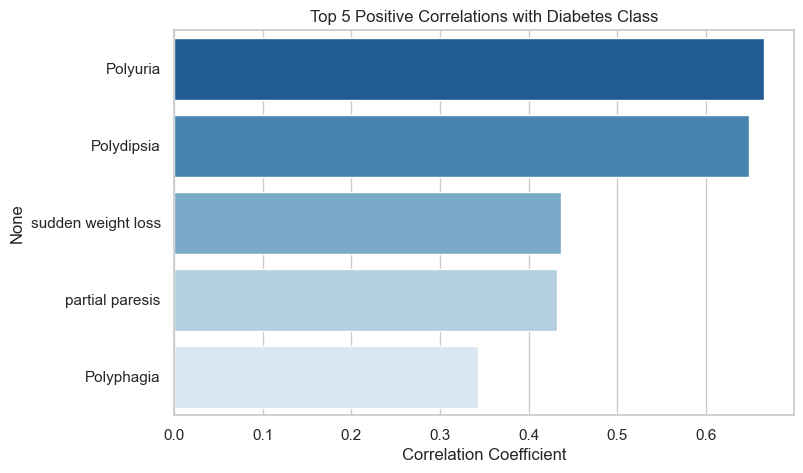

C:\Users\Joebass\AppData\Local\Temp\ipykernel_4868\1692904373.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_negative.values, y=top_negative.index, palette="Reds_r")


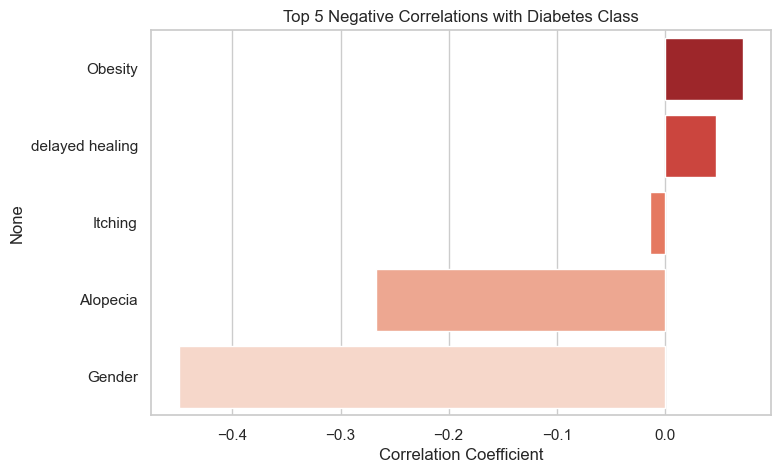

In [17]:
# Visualization of Top 5 Positve corelation values (Target class exclusive)
plt.figure(figsize=(8,5))
sns.barplot(x=top_positive.values, y=top_positive.index, palette="Blues_r")
plt.title("Top 5 Positive Correlations with Diabetes Class")
plt.xlabel("Correlation Coefficient")
plt.show();

# VIsualization of Top 5 negavative correlation 
plt.figure(figsize=(8,5))
sns.barplot(x=top_negative.values, y=top_negative.index, palette="Reds_r")
plt.title("Top 5 Negative Correlations with Diabetes Class")
plt.xlabel("Correlation Coefficient")
plt.show();

### **EDA Summary – Diabetes Risk Prediction Dataset**

The exploratory data analysis was performed on a validated **Diabetes Risk Prediction Dataset** containing clinical and demographic variables linked to diabetes. The goal was to identify the features most strongly associated with the target variable, **class**, which indicates whether an individual is diabetic.

The data showed that **age distribution peaked around 50 years**, with high occurrences between **25 and 70 years**, suggesting that diabetes risk spans across a wide adult range. The dataset was clean, with no missing values, and suitable for statistical and predictive modeling.

Correlation analysis revealed that the top features positively associated with diabetes were **Polyuria (0.67)**, **Polydipsia (0.65)**, **Sudden Weight Loss (0.44)**, **Partial Paresis (0.43)**, and **Polyphagia (0.34)**. These symptoms align with established clinical indicators of diabetes and highlight metabolic and neurological links common among diabetic individuals.

Conversely, the features most negatively correlated with the diabetes class were **Gender (-0.45)**, **Alopecia (-0.27)**, **Itching (-0.01)**, **Delayed Healing (0.05)**, and **Obesity (0.07)**. Although their relationships were generally weaker, they help explain demographic and physiological variations, suggesting that some non-symptomatic or less prominent features may inversely relate to diabetes occurrence.

Overall, the analysis confirms that **Polyuria and Polydipsia** are the strongest indicators of diabetes in this dataset, while **Gender differences** and certain physical traits show notable inverse patterns. The data trends are consistent with real-world medical expectations and provide a strong foundation for predictive modeling and further clinical interpretation.


## **Boosted Model**

In [18]:
# import your boosted LGBM-style model
from script import LGBMClassifier, train_test_split  
import numpy as np

In [19]:
# IMPORT BOOSTED MODEL & LOAD DATA 
# basic preprocessing
df_encoded = df_encoded.dropna().reset_index(drop=True)

# encode categorical columns (label-encoding only)
for col in df_encoded.select_dtypes(include="object").columns:
    df_encoded[col] = pd.factorize(df_encoded[col])[0]

# extract X and y
target_col = "class"    
y = df_encoded[target_col].astype(int).values
X = df_encoded.drop(columns=[target_col]).values.astype(float)
,
feature_names = df_encoded.drop(columns=[target_col]).columns.tolist()

# 60/20/20 split (train / val / test)
X_tmp, X_test, y_tmp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_tmp, y_tmp, test_size=0.25, random_state=42)

print("Shapes:")
print("Train:", X_train.shape)
print("Val:", X_val.shape)
print("Test:", X_test.shape)


Shapes:
Train: (312, 16)
Val: (104, 16)
Test: (104, 16)


In [21]:
# TRAIN BOOSTED MODEL & CALIBRATE THRESHOLD

final_model = LGBMClassifier(
    n_estimators=100,
    learning_rate=0.05,
    max_leaves=31,
    min_data_in_leaf=20,
    lambda_l2=1.0,
    random_state=42
)

# Train on training set
final_model.fit(X_train, y_train)

# Calibrate threshold to reach fixed specificity (e.g., 90%)
calibrated_threshold = final_model.set_calibration_threshold(
    X_val, y_val, target_specificity=0.90
)

print(f"Threshold: {calibrated_threshold:.5f}")

Threshold: 0.28322


**SHAP-LIKE TREE CONTRIBUTIONS**

In [22]:
# SHAP-LIKE TREE CONTRIBUTIONS 
# get SHAP-like attributions from boosted final_model
shap_vals = final_model.shap_values(X_test)   # shape: (n_samples, n_features)

# compute global importance using mean(|shap|)
mean_abs_importance = np.mean(np.abs(shap_vals), axis=0)

feature_importance_tree = sorted(
    zip(feature_names, mean_abs_importance),
    key=lambda x: x[1],
    reverse=True
)

print("=== Top Tree-Based Feature Importances ===")
for name, score in feature_importance_tree[:10]:
    print(f"{name}: {score:.5f}")


=== Top Tree-Based Feature Importances ===
Polydipsia: 0.68500
Polyuria: 0.55013
Age: 0.49432
Gender: 0.29276
Alopecia: 0.25227
Irritability: 0.16235
Itching: 0.12486
Obesity: 0.10390
sudden weight loss: 0.08768
muscle stiffness: 0.08687


**Model Feature Importance**

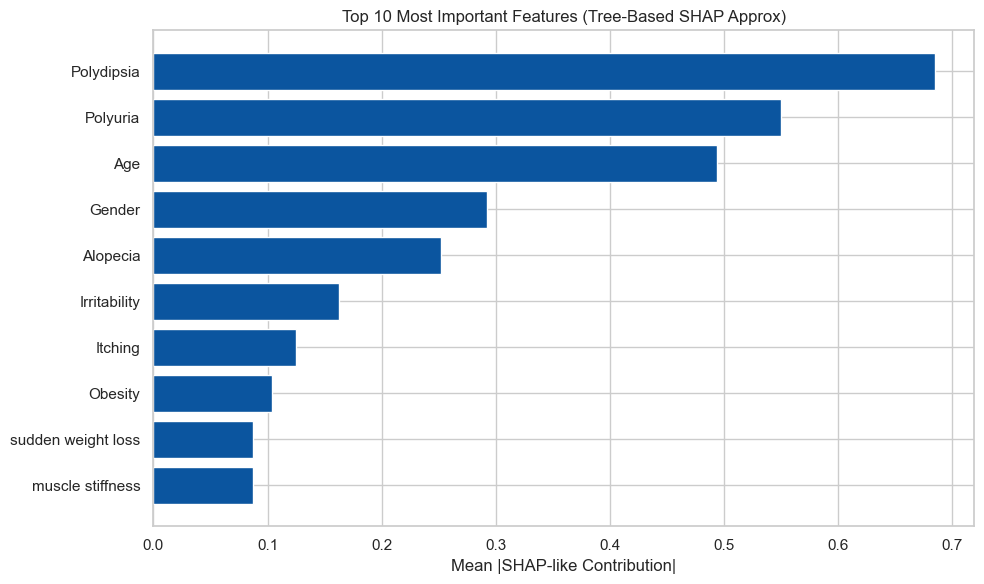

In [23]:
# Extract names and scores into arrays
feat_names = [x[0] for x in feature_importance_tree]
feat_scores = np.array([x[1] for x in feature_importance_tree])

# Sort descending (already sorted above, but just to be safe)
idx_sorted = np.argsort(feat_scores)[::-1]
feat_names_sorted = np.array(feat_names)[idx_sorted]
feat_scores_sorted = feat_scores[idx_sorted]

# Plot top K features (you can change K)
K = 10
plt.figure(figsize=(10, 6))
plt.barh(
    feat_names_sorted[:K][::-1],     # reverse for top-to-bottom layout
    feat_scores_sorted[:K][::-1],
)
plt.xlabel("Mean |SHAP-like Contribution|")
plt.title(f"Top {K} Most Important Features (Tree-Based SHAP Approx)")
plt.tight_layout()
plt.show()

**PURE NUMPY MODEL METRICS**

In [24]:
# AUC (via pairwise ranking / Mann–Whitney)
def auc_numpy(y_true, y_score):
    y_true = np.array(y_true)
    y_score = np.array(y_score)
    
    pos = y_score[y_true == 1]
    neg = y_score[y_true == 0]
    
    n_pos = len(pos)
    n_neg = len(neg)
    
    if n_pos == 0 or n_neg == 0:
        return 0.5  # undefined AUC
    
    # count number of (pos > neg) pairwise comparisons
    count = 0.0
    for p in pos:
        count += np.sum(p > neg) + 0.5 * np.sum(p == neg)
    
    auc = count / (n_pos * n_neg)
    return auc


# Confusion matrix (numpy)
def confusion_matrix_numpy(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    
    return tn, fp, fn, tp

# Expected Calibration Error (ECE)
def ece_numpy(y_true, y_prob, n_bins=10):
    y_true = np.array(y_true)
    y_prob = np.array(y_prob)
    
    bins = np.linspace(0, 1, n_bins + 1)
    total = len(y_true)
    ece = 0.0
    
    for i in range(n_bins):
        mask = (y_prob > bins[i]) & (y_prob <= bins[i+1])
        if mask.sum() == 0:
            continue
        
        avg_true = y_true[mask].mean()
        avg_prob = y_prob[mask].mean()
        
        ece += (mask.sum() / total) * abs(avg_true - avg_prob)
    
    return ece

# APPLY METRICS

proba_test = final_model.predict_proba(X_test)[:, 1]
pred_test = (proba_test >= calibrated_threshold).astype(int)

tn, fp, fn, tp = confusion_matrix_numpy(y_test, pred_test)

specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
auc = auc_numpy(y_test, proba_test)
ece_value = ece_numpy(y_test, proba_test)

print("=== PURE NUMPY METRICS ===")
print(f"AUC: {auc:.4f}")
print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Calibration Error (ECE): {ece_value:.5f}")


=== PURE NUMPY METRICS ===
AUC: 0.9949
Sensitivity: 1.0000
Specificity: 0.8182
Calibration Error (ECE): 0.08450


In [25]:
# Expected Calibration Error (ECE)

def ece(y_true, y_prob, n_bins=10):
    bins = np.linspace(0,1,n_bins+1)
    total = len(y_true)
    err = 0
    for i in range(n_bins):
        mask = (y_prob > bins[i]) & (y_prob <= bins[i+1])
        if mask.sum() == 0: 
            continue
        avg_true = y_true[mask].mean()
        avg_prob = y_prob[mask].mean()
        err += (mask.sum()/total)*abs(avg_true - avg_prob)
    return err

ece_value = ece(y_test, proba_test)

print(f"Calibration Error (ECE): {ece_value:.5f}")


Calibration Error (ECE): 0.08450


**Explanation Stability Algorithm**

In [26]:
def explanation_stability(shap_values, feature_names, n_boot=30, sample_ratio=0.6):
    """
    Measures explanation stability by bootstrapping and computing the
    variation (std) of feature importance rankings.
    
    shap_values: array of shape (n_samples, n_features)
    """
    n_samples, n_features = shap_values.shape
    feature_imps = []

    for _ in range(n_boot):
        # bootstrap sample indices
        idx = np.random.choice(n_samples, int(n_samples * sample_ratio), replace=True)
        
        # compute importance on the bootstrap sample
        imp = np.mean(np.abs(shap_values[idx]), axis=0)
        feature_imps.append(imp)

    feature_imps = np.array(feature_imps)  # shape (n_boot, n_features)

    # compute stability: lower std = more stable
    std_across_bootstraps = np.std(feature_imps, axis=0)

    # one scalar stability score (inverse of average variance)
    stability_score = 1 / (1 + np.mean(std_across_bootstraps))

    return stability_score, std_across_bootstraps


In [27]:
stability_score, shap_feature_std = explanation_stability(
    shap_vals,
    feature_names,
    n_boot=30
)

print("=== Explanation Stability ===")
print("Stability Score:", round(stability_score, 4))

print("\nFeature-wise Std Across Bootstraps:")
for name, std in zip(feature_names, shap_feature_std):
    print(f"{name}: {std:.5f}")


=== Explanation Stability ===
Stability Score: 0.9796

Feature-wise Std Across Bootstraps:
Age: 0.04400
Gender: 0.02164
Polyuria: 0.04912
Polydipsia: 0.06705
sudden weight loss: 0.01589
weakness: 0.00645
Polyphagia: 0.00625
Genital thrush: 0.01008
visual blurring: 0.00535
Itching: 0.01949
Irritability: 0.01338
delayed healing: 0.00699
partial paresis: 0.01386
muscle stiffness: 0.01504
Alopecia: 0.02082
Obesity: 0.01828


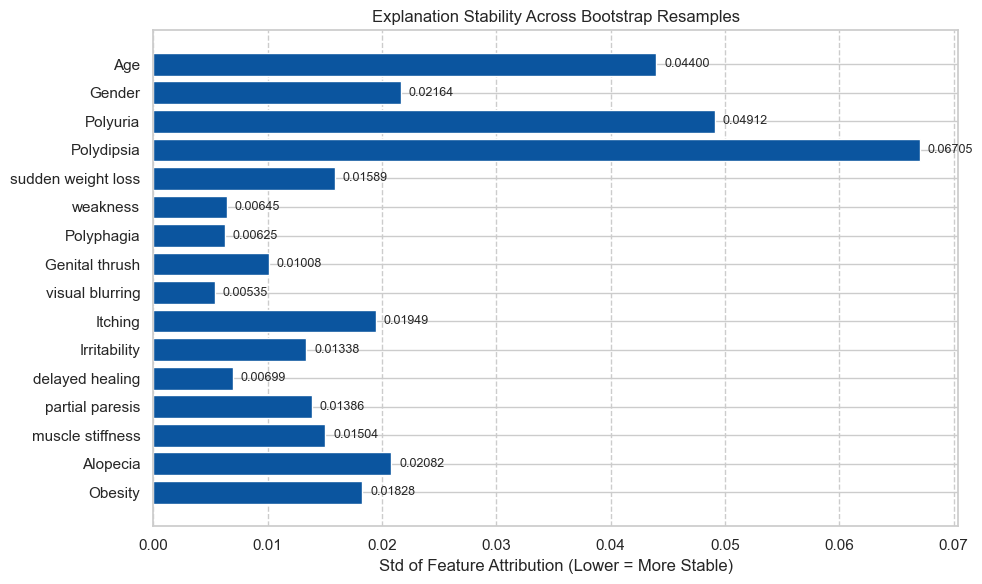

In [28]:
plt.figure(figsize=(10,6))
bars = plt.barh(feature_names, shap_feature_std)
plt.xlabel("Std of Feature Attribution (Lower = More Stable)")
plt.title("Explanation Stability Across Bootstrap Resamples")
plt.gca().invert_yaxis()  # highest at top
plt.grid(axis='x', linestyle='--')

x_max = shap_feature_std.max()
for bar, std_val in zip(bars, shap_feature_std):
    plt.text(std_val + x_max*0.01, bar.get_y() + bar.get_height()/2,
             f"{std_val:.5f}", va='center', fontsize=9)

plt.tight_layout()
plt.show()